In [3]:
import os
import sys
import time

from data.constants import saved_sessions_root
from data.generate import build
from data.load import (get_testing_set, get_training_set, get_validation_set,
                       load_sets_from_file)
from models.models import ConvolutionNeuralNetwork, LogisticRegression, NeuralNetwork
from classifier.helpers import show_stats_from_file
from classifier.models import Classifier
from model_trainer.models import DataForTrainer, DataSet
from data.constants import saved_sessions_root
from models.models import ConvolutionNeuralNetwork, LogisticRegression, NeuralNetwork
from classifier.models import Classifier

% matplotlib inline

datasets = load_sets_from_file()
train_set = DataSet(*get_training_set(datasets, size=15000))
valid_set = DataSet(*get_validation_set(datasets, size=3000))
test_set = DataSet(*get_testing_set(datasets, size=3000))
del datasets

('Training set', (15000, 28, 28, 1), (15000, 10))
('Validation set', (3000, 28, 28, 1), (3000, 10))
('Test set', (3000, 28, 28, 1), (3000, 10))

Step: 0: l=10.080759 l_valid=54.944160 l_test=55.131069 minibatch=7.0% valid=10.0% test=10.3%
Step: 50: l=1.087225 l_valid=1.124271 l_test=0.974967 minibatch=65.6% valid=66.6% test=72.5%
Step: 100: l=1.047107 l_valid=0.776051 l_test=0.588175 minibatch=71.1% valid=77.1% test=83.3%
Step: 150: l=0.722913 l_valid=0.685674 l_test=0.502391 minibatch=78.1% valid=79.6% test=86.0%
Step: 200: l=0.796979 l_valid=0.612365 l_test=0.419716 minibatch=79.7% valid=81.7% test=87.7%
Step: 250: l=0.828168 l_valid=0.579011 l_test=0.391737 minibatch=78.9% valid=83.1% test=89.0%
Step: 300: l=0.602925 l_valid=0.554408 l_test=0.364891 minibatch=83.6% valid=83.4% test=89.6%


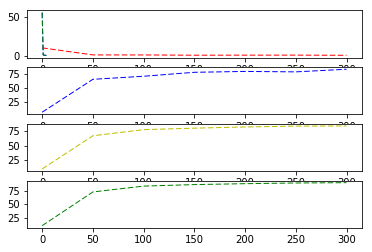

In [4]:
# This is for the convolutional network configuration:
data_for_trainer = DataForTrainer(train_set, valid_set, test_set, with_depth=True)
model = ConvolutionNeuralNetwork()
classifier = Classifier(model)
classifier.train(data_for_trainer)
classifier.stats()

('Training set', (15000, 784), (15000, 10))
('Validation set', (3000, 784), (3000, 10))
('Test set', (3000, 784), (3000, 10))

Step: 0: l=18.476522 l_valid=15.378357 l_test=15.416454 minibatch=3.1% valid=9.1% test=9.0%
Step: 10: l=5.530447 l_valid=5.661885 l_test=4.885882 minibatch=43.0% valid=41.1% test=44.3%
Step: 20: l=5.117758 l_valid=4.035937 l_test=3.223922 minibatch=52.3% valid=54.6% test=59.9%
Step: 30: l=4.865536 l_valid=3.474111 l_test=2.656568 minibatch=53.1% valid=61.9% test=67.8%
Step: 40: l=2.940609 l_valid=3.207256 l_test=2.406510 minibatch=66.4% valid=64.0% test=70.7%
Step: 50: l=2.011163 l_valid=2.996232 l_test=2.174884 minibatch=71.9% valid=66.1% test=74.1%
Step: 60: l=3.847944 l_valid=2.858703 l_test=2.032379 minibatch=63.3% valid=68.2% test=76.0%
Step: 70: l=2.684961 l_valid=2.766258 l_test=1.944129 minibatch=73.4% valid=68.9% test=76.8%
Step: 80: l=2.737189 l_valid=2.630812 l_test=1.862966 minibatch=69.5% valid=69.3% test=77.1%
Step: 90: l=2.327148 l_valid=2.542201

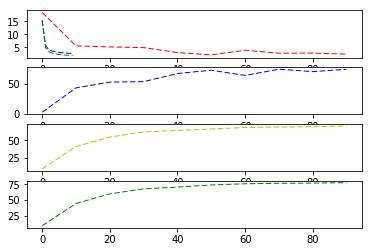

In [5]:
# This is for the neural network configuration:
data_for_trainer = DataForTrainer(train_set, valid_set, test_set)
model = LogisticRegression()
classifier = Classifier(model)
classifier.train(data_for_trainer)
classifier.stats()

('Training set', (15000, 784), (15000, 10))
('Validation set', (3000, 784), (3000, 10))
('Test set', (3000, 784), (3000, 10))

Step: 0: l=16.696836 l_valid=13.616292 l_test=13.399260 minibatch=9.4% valid=13.8% test=14.5%
Step: 10: l=4.515203 l_valid=4.953808 l_test=4.203999 minibatch=46.1% valid=43.5% test=48.3%
Step: 20: l=4.518769 l_valid=3.626290 l_test=2.950927 minibatch=55.5% valid=56.1% test=62.0%
Step: 30: l=3.721378 l_valid=3.133922 l_test=2.372983 minibatch=55.5% valid=62.0% test=68.5%
Step: 40: l=2.821678 l_valid=2.820159 l_test=2.150651 minibatch=64.8% valid=64.5% test=71.0%
Step: 50: l=2.343964 l_valid=2.651271 l_test=1.934744 minibatch=70.3% valid=67.7% test=74.2%
Step: 60: l=3.379519 l_valid=2.572429 l_test=1.838387 minibatch=66.4% valid=69.0% test=76.0%
Step: 70: l=2.735519 l_valid=2.468615 l_test=1.756577 minibatch=70.3% valid=69.6% test=76.3%
Step: 80: l=2.682332 l_valid=2.354724 l_test=1.666979 minibatch=68.8% valid=70.3% test=77.9%
Step: 90: l=2.135820 l_valid=2.3075

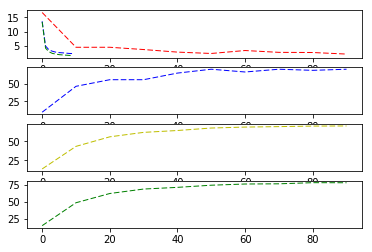

In [6]:
# This is for the logistic regression:
data_for_trainer = DataForTrainer(train_set, valid_set, test_set)
model = LogisticRegression()
classifier = Classifier(model)
classifier.train(data_for_trainer)
classifier.stats()